In [1]:
import os
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run "..//src//vgp_helper_fx_spectral"



In [2]:
ROOT_FOLDER = "D:\\VGP"

DATA_FOLDER = os.path.join(ROOT_FOLDER, "2P\\proc_s2p\\")
BEHAV_FOLDER = os.path.join(ROOT_FOLDER, "Bonsai\\")
METAFILE = os.path.join(ROOT_FOLDER, "Metafile_VGP2.4.xls")
rows, header = tp.metafilereader(METAFILE, sheetname="Analysis_Cas+malt")


File is excel file. Making csv metafile first


In [3]:
# Goes through metafile assembling data from s2p files where possible

cell_data={}

for row in rows:
    try:
        key=row[0]+'_'+row[3]
        animal=row[0]
        day=row[2]
        date=int(row[1])
        events=row[6]
#         solution=row[3]
        
        s2p_folder = os.path.join(DATA_FOLDER,
                                  "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                                  .format(animal, day, date))
        events_file =BEHAV_FOLDER+events
        
        
        cell_data[key] = assemble_data(s2p_folder,events_file)
        cell_data[key]['animal'] = row[0]
        cell_data[key]['diet'] = row[11]
        cell_data[key]['session'] = row[3]
        cell_data[key]['solution']=row[5]
        
    except FileNotFoundError:
        print('Cannot find file for', key)
     

Cannot find file for VGP306_M5
Cannot find file for VGP307_C3
Cannot find file for VGP402_C1


In [4]:
mice=[]

for key in cell_data.keys(): 
    d=cell_data[key]
    mouseid=d['animal']
    if mouseid not in mice: mice.append(mouseid)

In [5]:
test= np.mean(cell_data['VGP118_C1']['lick_snips_all'][np.where(cell_data['VGP118_C1']['lick_responsive']==1)],axis=1)

In [6]:
PR_cas=[]
PR_cas_f=[]
PR_malt=[]
PR_malt_f=[]
animal=[]
for mouse in mice: 
    temp_PR=[]
    temp_PR2=[]
    
    for key in cell_data.keys():
        d=cell_data[key]
        
        if d['animal']==mouse and d['diet']=='PR' and d['solution']=='Cas': 
            snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
            temp_PR.append(np.mean(snips, axis=0))
            
        elif d['animal']==mouse and d['diet']=='PR' and d['solution']=='Malt': 
            snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
            temp_PR2.append(np.mean(snips, axis=0))
            
            

    if len(temp_PR)>0:
        PR_cas.append(temp_PR)
    if len(temp_PR2)>0:
        PR_malt.append(temp_PR)

               
for animal in PR_cas: 
    if not np.isnan(animal).any(): 
        PR_cas_f.append(animal)
        
for animal in PR_malt: 
    if not np.isnan(animal).any(): 
        PR_malt_f.append(animal)
        
        


In [7]:
PR_C1_licks_act=[]
PR_C1_licks_inh=[]

PR_C2_licks_act=[]
PR_C2_licks_nonres=[]

PR_C3_licks_act=[]
PR_C3_licks_nonres=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_C1_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C1_licks_nonres.append(np.mean(snips_non, axis=0))
        
    elif d['diet']=='PR' and d['session']=='C2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_C2_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C2_licks_nonres.append(np.mean(snips_non, axis=0))
    
    elif d['diet']=='PR' and d['session']=='C3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_C3_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C3_licks_nonres.append(np.mean(snips_non, axis=0))

#Filtering out empty arrays        
PR_C2_licks_act_f=[]        
for animal in PR_C2_licks_act: 
    if not np.isnan(animal).any(): 
        PR_C2_licks_act_f.append(animal)
        
PR_C1_licks_inh_f=[]        
for animal in PR_C1_licks_inh: 
    if not np.isnan(animal).any(): 
        PR_C1_licks_inh_f.append(animal)

        
        

PR_Cas=[]
snips_cas=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['solution']=='Cas':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_Cas.append(np.mean(lick_snips, axis=0))

        
        
        
PR_Cas_f=[]        
for animal in PR_Cas: 
    if not np.isnan(animal).any(): 
        PR_Cas_f.append(animal)
        
        


In [8]:
PR_M1_licks_act=[]
PR_M2_licks_act=[]
PR_M3_licks_act=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='M1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_M1_licks_act.append(np.mean(lick_snips, axis=0))
        
    elif d['diet']=='PR' and d['session']=='M2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_M2_licks_act.append(np.mean(lick_snips, axis=0))       
    
    elif d['diet']=='PR' and d['session']=='M3':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_M3_licks_act.append(np.mean(lick_snips, axis=0))
        
print(animal)
PR_M2_licks_act_f=[]        
for animal in PR_M2_licks_act: 
    if not np.isnan(animal).any(): 
        PR_M2_licks_act_f.append(animal)
        
        
        
PR_malt=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['solution']=='Malt':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_malt.append(np.mean(lick_snips, axis=0))
        
        
        
PR_malt_f=[]        
for animal in PR_malt: 
    if not np.isnan(animal).any(): 
        PR_malt_f.append(animal)

['VGP118', 'VGP203', 'VGP302', 'VGP306', 'VGP307', 'VGP402', 'VGP505', 'VGP506', 'VGP509']


In [9]:
NR_C1_licks_act=[]
NR_C2_licks_act=[]
NR_C3_licks_act=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='C1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C1_licks_act.append(np.mean(lick_snips, axis=0))

        
    elif d['diet']=='NR' and d['session']=='C2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C2_licks_act.append(np.mean(lick_snips, axis=0))

    
    elif d['diet']=='NR' and d['session']=='C3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C3_licks_act.append(np.mean(lick_snips, axis=0))




NR_C3_licks_act_f=[]        
for animal in NR_C3_licks_act: 
    if not np.isnan(animal).any(): 
        NR_C3_licks_act_f.append(animal)
        
        
NR_cas=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['solution']=='Cas':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_cas.append(np.mean(lick_snips, axis=0))
        
        
        
NR_cas_f=[]        
for animal in NR_cas: 
    if not np.isnan(animal).any(): 
        NR_cas_f.append(animal)


C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [10]:
NR_M1_licks_act=[]
NR_M2_licks_act=[]
NR_M3_licks_act=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='M1':
        lick_snips1=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M1_licks_act.append(np.mean(lick_snips1, axis=0))
        
    elif d['diet']=='NR' and d['session']=='M2':
        animal.append(d['animal'])
        lick_snips2=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M2_licks_act.append(np.mean(lick_snips2, axis=0))

    elif d['diet']=='NR' and d['session']=='M3':
        animal.append(d['animal'])
        lick_snips3=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M3_licks_act.append(np.mean(lick_snips3, axis=0))

        
NR_malt=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['solution']=='Malt':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_malt.append(np.mean(lick_snips, axis=0))
        
        
        
NR_malt_f=[]        
for animal in NR_malt: 
    if not np.isnan(animal).any(): 
        NR_malt_f.append(animal)


Text(0.5, 1.0, 'Maltodextrin')

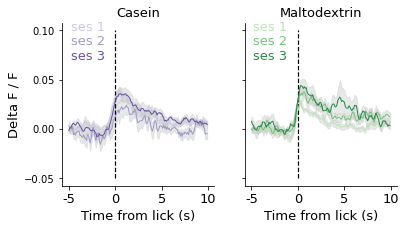

In [27]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)

tp.shadedError(ax[0], PR_C1_licks_act, linecolor="#cbc9e2")
# tp.shadedError(ax[0], PR_C1_licks_inh_f, linecolor="black")


tp.shadedError(ax[0], PR_C2_licks_act_f, linecolor="#9e9ac8")

tp.shadedError(ax[0], PR_C3_licks_act, linecolor="#6a51a3")



tp.shadedError(ax[1], PR_M1_licks_act, linecolor="#bae4b3")

tp.shadedError(ax[1], PR_M2_licks_act_f, linecolor="#74c476")

tp.shadedError(ax[1], PR_M3_licks_act, linecolor="#238b45")




ax[0].text(2, 0.1, "ses 1",color='#cbc9e2', size=13)
ax[0].text(2, 0.085, "ses 2", color="#9e9ac8",size=13)
ax[0].text(2, 0.07, "ses 3", color="#6a51a3",size=13)

ax[1].text(2, 0.1, "ses 1",color='#bae4b3', size=13)
ax[1].text(2, 0.085, "ses 2", color="#74c476",size=13)
ax[1].text(2, 0.07, "ses 3", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)

ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)



# f.savefig("..//output//PR_licksnips_casmalt.png")


Text(0.5, 1.0, 'Maltodextrin')

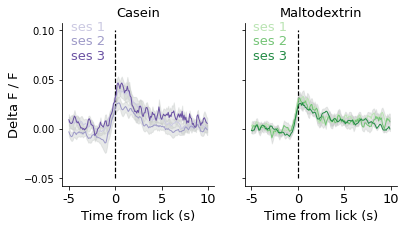

In [33]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)

tp.shadedError(ax[0], NR_C1_licks_act, linecolor="#cbc9e2")

tp.shadedError(ax[0], NR_C2_licks_act, linecolor="#9e9ac8")

tp.shadedError(ax[0], NR_C3_licks_act_f, linecolor="#6a51a3")



tp.shadedError(ax[1], NR_M1_licks_act, linecolor="#bae4b3")

tp.shadedError(ax[1], NR_M2_licks_act, linecolor="#74c476")

tp.shadedError(ax[1], NR_M3_licks_act, linecolor="#238b45")






ax[0].text(2, 0.1, "ses 1",color='#cbc9e2', size=13)
ax[0].text(2, 0.085, "ses 2", color="#9e9ac8",size=13)
ax[0].text(2, 0.07, "ses 3", color="#6a51a3",size=13)

ax[1].text(2, 0.1, "ses 1",color='#bae4b3', size=13)
ax[1].text(2, 0.085, "ses 2", color="#74c476",size=13)
ax[1].text(2, 0.07, "ses 3", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)


# f.savefig("..//output//NR_licksnips_casmalt.png")

### making heatmap of all cells 

In [36]:
test=cell_data['VGP203_M3']['lick_snips_all']

len(test)

29

In [34]:
from itertools import chain

snips_PR_cas=[]
snips_PR_malt=[]
snips_NR_cas=[]
snips_NR_malt=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C3':
        snips=d['lick_snips_all']
        for cell in snips:
            snips_PR_cas.append(np.mean(cell, axis=0))
    elif d['diet']=='PR' and d['session']=='M3':
        snips=d['lick_snips_all']
        for cell in snips: 
            snips_PR_malt.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='C3':
        snips=d['lick_snips_all']
        for cell in snips:
            snips_NR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='M3':
        snips=d['lick_snips_all']
        for cell in snips:
            snips_NR_malt.append(np.mean(cell, axis=0))

        
        


In [35]:
arrays= snips_PR_malt
subset_values= [arr[50:71] for arr in arrays]
subset_mean=[np.mean(subset) for subset in subset_values]
sorted_PR_malt= [arr for _, arr in sorted(zip(subset_mean,arrays), key=lambda x: np.mean(x[1][50:71]),reverse=True)]

In [36]:
arrays= snips_PR_cas
subset_values= [arr[50:71] for arr in arrays]
subset_mean=[np.mean(subset) for subset in subset_values]
sorted_PR_cas= [arr for _, arr in sorted(zip(subset_mean,arrays), key=lambda x: np.mean(x[1][50:71]),reverse=True)]

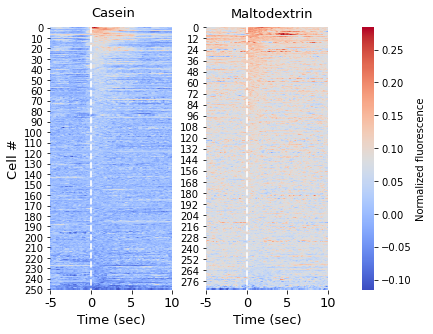

In [37]:
f, ax = plt.subplots(figsize=(6,5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)


y1 = sorted_PR_cas

y2 = sorted_PR_malt

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(50,-10, "Casein", size=13)
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(30,-10, "Maltodextrin", size=13)
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)

ax[0].set_ylabel("Cell #", size=13)
# ax[0].set_yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_allcells_PR.png")

In [38]:
cols = ["animal", "diet", "session","solution", "lick_activated"]
df_activated = pd.DataFrame(columns=cols)

for key, d in cell_data.items():
    percent_act = d["df_responsive"].loc["lick_all", "responsive"] / np.sum(d["df_responsive"].loc['pump_only':'neither',"activated"]) * 100
    data = np.array([d["animal"], d["diet"], d["session"], d["solution"],percent_act])
    df_temp = pd.DataFrame({col: value for col, value in zip(cols, data)},
                          index=[key.split("_")[0]]).astype({'lick_activated':'float'})
    

    df_activated = pd.concat([df_activated, df_temp])
df_activated


,animal,diet,session,solution,lick_activated
VGP118,VGP118,PR,C1,Cas,66.666667
VGP118,VGP118,PR,C2,Cas,53.846154
VGP118,VGP118,PR,M1,Malt,62.500000
VGP118,VGP118,PR,M2,Malt,55.000000
VGP118,VGP118,PR,M3,Malt,38.888889
...,...,...,...,...,...
VGP509,VGP509,PR,M2,Malt,69.444444
VGP509,VGP509,PR,C2,Cas,34.482759
VGP509,VGP509,PR,C3,Cas,56.250000
VGP509,VGP509,PR,M3,Malt,53.846154


In [39]:
df_pref = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["session"],
                         values="lick_activated",
                         aggfunc="mean")
             .astype({"C3": "float", "M3": "float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
             .assign(pref1=lambda df_: df_.C3 - df_.M3)
           .assign(pref2=lambda df_: df_.C6 - df_.M6)

           
            )


In [40]:
df_session = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["session"],
                         values="lick_activated",
#                          aggfunc="mean"
                                 )
             .astype({"C1": "float", 'C2':"float","C3":"float","M1": "float","M2":"float", "M3":"float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
        )

Dataframes for each group (NR and PR) Casein and maltodextrin activated cells

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making dataframe for NR-NRPR group
df_NR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Cas")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PR", "PRNR"])
 .dropna()
)

df_NR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Malt")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PR", "PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Cas")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR,
         PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NR", "NRPR"])
 .dropna()
)

df_PR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Malt")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR,
         PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NR", "NRPR"])
 .dropna()
)



KeyError: 'Cas'

Figure for cells activated by casein and maltodextrin

In [42]:
NR_cas=[]
NRPR_cas=[]
for row in df_NR_cas.iterrows():
    NR_cas.append(row[1].NR)
    NRPR_cas.append(row[1].NRPR)

NR_malt=[]
NRPR_malt=[]
for row in df_NR_malt.iterrows():
    NR_malt.append(row[1].NR)
    NRPR_malt.append(row[1].NRPR)
    
    
PR_cas=[]
PRNR_cas=[]
for row in df_PR_cas.iterrows():
    PR_cas.append(row[1].PR)
    PRNR_cas.append(row[1].PRNR)

PR_malt=[]
PRNR_malt=[]
for row in df_PR_malt.iterrows():
    PR_malt.append(row[1].PR)
    PRNR_malt.append(row[1].PRNR)

    

colors_1=['#af8dc3', '#762a83','#762a83','#af8dc3']
colors_M=['#7fbf7b', '#1b7837','#1b7837','#7fbf7b']


f,ax=plt.subplots(figsize=(4.5,5), ncols=1, nrows=2, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)

tp.barscatter([[NR_cas,NRPR_cas],[PR_cas,PRNR_cas]], 
              paired= True,
              barfacecolor=colors_1,
              barfacecolor_option="individual",
              barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[0],
              show_legend=False)

tp.barscatter([[NR_malt,NRPR_malt],[PR_malt,PRNR_malt]], 
              paired= True,
              barfacecolor=colors_M,
              barfacecolor_option="individual",
              barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[1],
              show_legend=False)

ax[0].set_ylabel('Lick responsive cells (%)',fontsize = 13)
ax[0].set_yticks([0,20,40,60,80])
ax[0].set_yticklabels([0,20,40,60,80], fontsize = 13)

ax[1].set_ylabel('Lick responsive cells (%)',fontsize = 13)
ax[1].set_yticks([0,20,40,60,80])
ax[1].set_yticklabels([0,20,40,60,80], fontsize = 13)


ax[0].set_title('Casein', fontsize =15)
ax[1].set_title('Maltodextrin', fontsize =15)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\%_lick_activated_cells.png')

NameError: name 'df_NR_cas' is not defined

Dataframes for each group (NR and PR) Preferense

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making dataframe for NR-NRPR group
df_NR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)
# print(df_NR)
# print(df_PR)


pref_NR=[]
for row in df_NR.iterrows():
    pref_NR.append(row[1].NR)
    
pref_PR=[]
for row in df_PR.iterrows():
    pref_PR.append(row[1].PR)

    
pref_NRPR=[]
for row in df_NRPR.iterrows():
    pref_NRPR.append(row[1].NRPR)
    
pref_PRNR=[]
for row in df_PRNR.iterrows():
    pref_PRNR.append(row[1].PRNR)
    

Figure for proportion of cells activated by casin - malodextrin

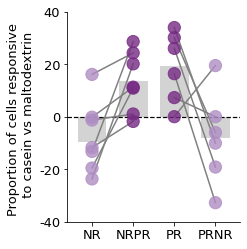

In [45]:
f, ax = plt.subplots(figsize=(4,4))
f.subplots_adjust(wspace=0.15,hspace=0.35, bottom=0.15, left=0.3)


x1 = [1,2]
x2=[3,4]

for row in zip(pref_NR,pref_NRPR):
    y=row
    ax.plot(x1, y, color="grey")
    ax.scatter(x1, y, s=150, color=["#af8dc3", "#762a83"], zorder=20, alpha=0.8)

for row in zip(pref_PR,pref_PRNR):
    y=row
    ax.plot(x2, y, color="grey")
    ax.scatter(x2, y, s=150, color=["#762a83", "#af8dc3"], zorder=20, alpha=0.8)

  
    
ax.bar(x1, [np.mean(pref_NR),np.mean(pref_NRPR)], width=0.7, zorder=-1, color="lightgrey")
ax.bar(x2, [np.mean(pref_PR),np.mean(pref_PRNR)], width=0.7, zorder=-1, color="lightgrey")
    
ax.set_ylabel("Proportion of cells responsive \n to casein vs maltodextrin", size=13)
ax.set_yticks([-40,-20,0,20,40])
ax.set_yticklabels(['-40','-20','0','20','40'], size=13)

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["NR", 'NRPR','PR','PRNR'], size=13)
ax.set_xlim([0.4,4.6])

ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=1.2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\pref_casein_cells.png')

In [46]:
PR_C1_lick=[]
PR_C2_lick=[]
PR_C3_lick=[]

PR_M1_lick=[]
PR_M2_lick=[]
PR_M3_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C1':
        PR_C1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

    elif d['diet']=='PR' and d['session']=='C2':
        PR_C2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR' and d['session']=='C3':
        PR_C3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='PR'and d['session']=='M1':
        PR_M1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR'and d['session']=='M2':
        PR_M2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR'and d['session']=='M3':
        PR_M3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)


len(PR_C3_lick)

8

In [47]:
PRNR_C4_lick=[]
PRNR_C5_lick=[]
PRNR_C6_lick=[]

PRNR_M4_lick=[]
PRNR_M5_lick=[]
PRNR_M6_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PRNR' and d['session']=='C4':
        PRNR_C4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

    elif d['diet']=='PRNR' and d['session']=='C5':
        PRNR_C5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PRNR' and d['session']=='C6':
        PRNR_C6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='PRNR'and d['session']=='M4':
        PRNR_M4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PRNR'and d['session']=='M5':
        PRNR_M5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PRNR'and d['session']=='M6':
        PRNR_M6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

In [48]:
NR_C1_lick=[]
NR_C2_lick=[]
NR_C3_lick=[]

NR_M1_lick=[]
NR_M2_lick=[]
NR_M3_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='C1':            
        lick_act=(len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))
        all_cells=len(d['lick_responsive'])
        NR_C1_lick.append(lick_act/all_cells*100)
    elif d['diet']=='NR' and d['session']=='C2':
        NR_C2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR' and d['session']=='C3':
        NR_C3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='NR'and d['session']=='M1':
        NR_M1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR'and d['session']=='M2':
        NR_M2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR'and d['session']=='M3':
        NR_M3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)


len(NR_M3_lick)

8

In [49]:
NRPR_C4_lick=[]
NRPR_C5_lick=[]
NRPR_C6_lick=[]

NRPR_M4_lick=[]
NRPR_M5_lick=[]
NRPR_M6_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NRPR' and d['session']=='C4':
        NRPR_C4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NRPR' and d['session']=='C5':
        NRPR_C5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NRPR' and d['session']=='C6':
        NRPR_C6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='NRPR'and d['session']=='M4':
        NRPR_M4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NRPR'and d['session']=='M5':
        NRPR_M5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NRPR'and d['session']=='M6':
        NRPR_M6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)



Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.


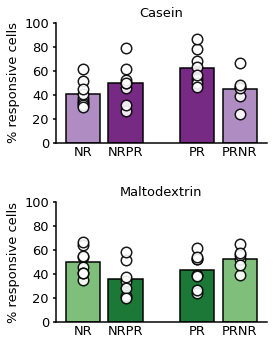

In [50]:



f,ax=plt.subplots(figsize=(4.5,5), ncols=1, nrows=2, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)
colors_C=['#af8dc3', '#762a83','#762a83','#af8dc3']
colors_M=['#7fbf7b', '#1b7837','#1b7837','#7fbf7b']


tp.barscatter([[NR_C3_lick,NRPR_C6_lick],[PR_C3_lick,PRNR_C6_lick]], 
#               paired= True,
              barfacecolor=colors_C,
              barfacecolor_option="individual",
              barlabels=['NR','NRPR','PR','PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[0],
              show_legend=False)

tp.barscatter([[NR_M3_lick,NRPR_M6_lick],[PR_M3_lick,PRNR_M6_lick]], 
#               paired= True,
              barfacecolor=colors_M,
              barfacecolor_option="individual",
              barlabels=['NR','NRPR','PR','PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[1],
              show_legend=False)



ax[0].set_ylabel('% responsive cells', fontsize=13)
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100], size=13)


ax[1].set_ylabel('% responsive cells', fontsize=13)
ax[1].set_yticks([0,20,40,60,80,100])
ax[1].set_yticklabels([0,20,40,60,80,100], size=13)




ax[0].set_title('Casein',fontsize=13)
ax[1].set_title('Maltodextrin',fontsize=13)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\cells_S3.png')

## Proportion of cells responsive to Cas/malt

In [ ]:
df_diet1 = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
 .drop(columns=["NRPR", "PRNR"])
)



In [ ]:
my_colors = {'NR': '#525252', 'PR': '#2171b5'}

'','','',''
f, ax = plt.subplots(figsize=(6,3),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})

sns.boxplot(data=df_diet1,orient="h", ax=ax, palette=my_colors)


ax.set_ylabel("")
ax.set_yticklabels(["NR", "PR"])
ax.set_xticks([-30, 0, 20, 30])
ax.set_xlabel("Lick-activated cells (casein - maltodextrin)")

ax.axvline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
df_boxplot = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
#  .drop(columns=["NRPR", "PRNR"])
)





In [ ]:
my_colors = {'NR': '#525252', 'NRPR': '#969696', 'PR': '#2171b5','PRNR':'#6baed6'}

'','','',''
f, ax = plt.subplots(figsize=(4,6),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})


sns.boxplot(data=df_boxplot,orient="v", ax=ax, palette=my_colors)


ax.set_xlabel("")
ax.set_xticklabels(["NR",'NRPR', "PR", 'PRNR'],size=13)
ax.set_yticks([-30, -15,0, 15, 30])
ax.set_yticklabels(['-30','-15', '0', '15', '30'],size=13)
ax.set_ylabel("Lick-activated cells (casein - maltodextrin)",size=13)

ax.axhline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
sns.boxplot?